# Exercise 3.2

In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

**Task 1**

In [2]:
#load data
data_smokers = loadmat('data_smokers.mat')
#to only have the data in one array
smokers_ar = data_smokers['data']

In [3]:
smokers_ar

array([[19,  0, 87],
       [ 8,  0, 77],
       [ 8,  0, 66],
       ...,
       [14,  0, 54],
       [ 2,  0, 77],
       [14,  1, 45]], dtype=int32)

**Task 2**

In [4]:
#plot histograms
#for non smokers
idx_nonSmoker = np.where(smokers_ar[:, 1]==0)
age_nonSmoker = smokers_ar[idx_nonSmoker][:, 2]

In [5]:
#for smokers
idx_smoker = np.where(smokers_ar[:, 1]==1)
age_smoker = smokers_ar[idx_smoker][:, 2]

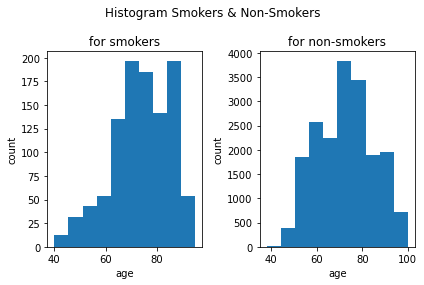

In [6]:
#histogram Smokers
fig, ax = plt.subplots(1, 2, tight_layout=True)
plt.suptitle('Histogram Smokers & Non-Smokers')
ax[0].hist(age_smoker)
ax[1].hist(age_nonSmoker)
titles = ['smokers', 'non-smokers']
for i in range(2):
    ax[i].set_xlabel('age')
    ax[i].set_ylabel('count')
    ax[i].set_title('for ' + titles[i])
plt.show()

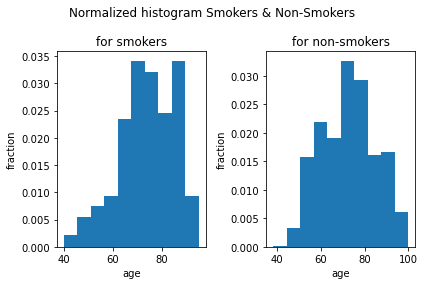

In [7]:
#histogram Smokers
fig, ax = plt.subplots(1, 2, tight_layout=True)
plt.suptitle('Normalized histogram Smokers & Non-Smokers')
ax[0].hist(age_smoker, density=True)
ax[1].hist(age_nonSmoker, density=True)
titles = ['smokers', 'non-smokers']
for i in range(2):
    ax[i].set_xlabel('age')
    ax[i].set_ylabel('fraction')
    ax[i].set_title('for ' + titles[i])
plt.show()

The normalized and non-normalized histograms both show, that there is one peak for age of death for non smokers around 70 to 80 years. On the other hand the age of death for smokers seems to vary more and doesn't show one clear peak. 

**Task 3**

In [8]:
countries = []
for i in range(20):
    idx_country = np.where(smokers_ar[:, 0]==i)
    countries.append(smokers_ar[idx_country])

In [9]:
life_expectancy = []
fraction_smokers = []
for i in range(20):
    #life expectancy is average of age when dying
    life_expectancy.append(np.mean(countries[i][:, 2]))
    #fraction smokers
    nrSmokers = sum(countries[i][:, 1])
    fraction_smokers.append(nrSmokers/len(countries[i]))

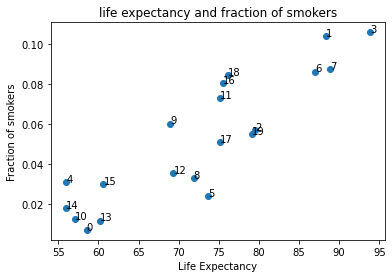

In [10]:
#plotting the information
fig, ax = plt.subplots()
plt.title('life expectancy and fraction of smokers')
ax.scatter(life_expectancy, fraction_smokers)
ax.set_xlabel('Life Expectancy')
ax.set_ylabel('Fraction of smokers')
for i in range(20):
    ax.annotate(i, (life_expectancy[i], fraction_smokers[i]))

For this task we decided to use a scatterplot since we are interested in the relationship of a countries life expectancy and its fraction of smokers. This means we have 3 information parts to show. A scatterplot is in this case a good option for this since it shows a clear trend. Furthermore the data is not heavily clustered making it suitable to use direct labeling of the country for each dot in the scatter plot.
On an additional note to the scatterplot, one might at first be suprised that countries with a higher fraction of smokers have a higher life expectancy. The explanation for this might be that in richer countries (where there is better health care and smaller death rate) more people tend to smoke, but live on average still longer than people from countries with worse living conditions (e.g. no or little healt cahre). So this visualization is a case where one has to be cautious and where the relationship depicted doesn't tell the full (or true) story.

**Task 4**

In [11]:
le_smoker = []
le_nonSmoker = []
smokers = []
nonSmokers = []
for i in range(len(countries)):
    le_nonSmoker.append(np.mean(countries[i][np.where(countries[i][:, 1]==0), 2])) # life expactancy of nonsmokers
    nonSmokers.append(countries[i][np.where(countries[i][:, 1]==0)]) #already for task 5: have lists for smoker and non smoker sorted by country
    le_smoker.append(np.mean(countries[i][np.where(countries[i][:, 1]==1), 2]))
    smokers.append(countries[i][np.where(countries[i][:, 1]==1)])

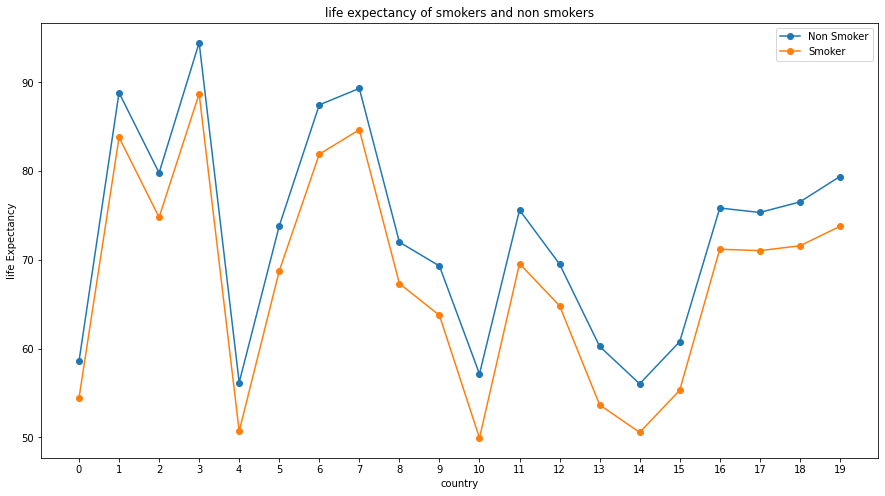

In [12]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('life expectancy of smokers and non smokers')
ax.plot(le_nonSmoker, 'o-')
ax.plot(le_smoker, 'o-')
plt.legend(['Non Smoker', 'Smoker'])
ax.set_xlabel('country')
ax.set_xticks([i for i in range(20)])
ax.set_ylabel('life Expectancy')
plt.show()

Here we decided to use the lineplot with printed points for each country. Even though we noted, that the linking of the points might be seen as not ideal since there not a real relationship between the countries for the task at hand. However, the advantage of this way to visualize the data are stronger. Firstly, only showing the points without connecting lines is confussing and doesn't show any kind of trend or connection (unless one takes a long time to try and figure it out). Secondly, the aim of this plot was to have a look at the life expectancy of smokers and non smokers. Due to the two lines the viewer can easily see, that the life expectancy of smokers is on average smaller than the life expectancy for non smokers (without an exception). Furthermore the dots put emphasizes on the life expectancy for the each country at the same time decreasing the importance of the lines for the interpretation of this plot.

**Task5**

In [13]:
#ordering of countries based on life expactancy of whole population starting with the lowest life expectancy
sort_idx = np.argsort(life_expectancy)
smokers = smokers_ar[idx_smoker]
nonSmokers = smokers_ar[idx_nonSmoker]

In [95]:
#flatten the results as inputs for the histogram 
#country_nonSmokers_flat = [nonSmokers[i][j, 0] for i in range(len(nonSmokers)) for j in range(len(nonSmokers[i]))]
#age_nonSmokers_flat = [nonSmokers[i][j, 2] for i in range(len(nonSmokers)) for j in range(len(nonSmokers[i]))]
#country_smokers_flat = [smokers[i][j, 0] for i in range(len(smokers)) for j in range(len(smokers[i]))]
#age_smokers_flat = [smokers[i][j, 2] for i in range(len(smokers)) for j in range(len(smokers[i]))]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
#flatten the results as inputs for the histogram 
#country_nonSmokers_flat = [nonSmokers[i][j, 0] for i in range(len(nonSmokers)) for j in range(len(nonSmokers[i]))]
#age_nonSmokers_flat = [nonSmokers[i][j, 2] for i in range(len(nonSmokers)) for j in range(len(nonSmokers[i]))]
#country_smokers_flat = [smokers[i][j, 0] for i in range(len(smokers)) for j in range(len(smokers[i]))]
#age_smokers_flat = [smokers[i][j, 2] for i in range(len(smokers)) for j in range(len(smokers[i]))]

In [20]:
#Non Smokers
rng_ns = [[0, 19], [min(nonSmokers[:, 2]), max(nonSmokers[:, 2])]]
hist_ns,edgesX,edgesY=np.histogram2d(nonSmokers[:, 0], nonSmokers[:, 2], bins=[20, [i for i in range(40, 100, 2)]], range=rng_ns, density=True)
ordered_hist_ns = np.array([hist_ns[idx] for idx in sort_idx]).transpose() #sort histogram by life expectancy (increasing) and transpose for vosialuiztaion purposes (since histogram2d does not follow cartesian conventions)

#plotting the respective histogram
#fig, ax = plt.subplots(figsize=(5, 10))
#plt.imshow(ordered_hist_ns, origin="lower", vmin=0, vmax=max([np.max(ordered_hist_ns)]))
#ax.set_xticks([i for i in range(20)])
#ax.set_xticklabels(sort_idx)
#plt.colorbar();
#plt.show()

In [19]:
#Smokers
rng_s = [[0, 19], [min(smokers[:, 2]), max(smokers[:, 2])]]
hist_s,edgesX,edgesY=np.histogram2d(smokers[:, 0], smokers[:, 2], bins=[20, [i for i in range(40, 100, 2)]], range=rng_s, density=True)
ordered_hist_s = np.array([hist_s[idx] for idx in sort_idx]).transpose() #sort histogram by life expectancy (increasing) and transpose for vosialuiztaion purposes (since histogram2d does not follow cartesian conventions)

#plotting the respective histogram
#fig, ax = plt.subplots(figsize=(5, 10))
#plt.imshow(ordered_hist_s, origin="lower", vmin=0, vmax=max([np.max(ordered_hist_s)]))
#ax.set_xticks([i for i in range(20)])
#ax.set_xticklabels(sort_idx)
#plt.colorbar();
#plt.show()

In [27]:
#create new image so we cann later put the two histograms in two different color channels
img = np.zeros((hist_s.shape[1], hist_s.shape[0], 3)) #*3 because of RGB
img[:, :, 0] = ordered_hist_ns
img[:, :, 2] = ordered_hist_s

In [32]:
#Normlization of the color channels
max_val = np.max(img)
min_val = np.min(img)
img_norm = (img-min_val)/(max_val-min_val)

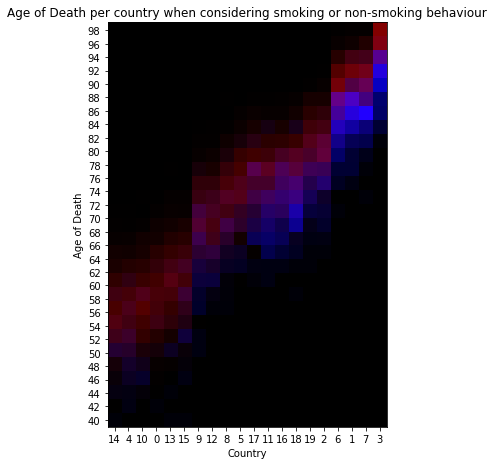

In [33]:
fig, ax = plt.subplots(figsize=(5, 10))
plt.imshow(img_norm, origin="lower")
ax.set_xticks([i for i in range(20)])
ax.set_xticklabels(sort_idx)
ax.set_yticks(ticks = np.linspace(start=0, stop=27.93, num=int(len(edgesY))))
ax.set_yticklabels([str(i) for i in range(40, 100, 2)])
ax.set_xlabel('Country')
ax.set_ylabel('Age of Death')
plt.title('Age of Death per country when considering smoking or non-smoking behaviour')
plt.show()

In this visualization red represents people who do not smoke where as blue depicts the opposite. One can see that smoking makes a difference especially in countries, that have a high life expectancy whereas for countries with lower life expectancy it doesn't show such a significant difference. This might be due to countries with lower life expectancies having in general worse living conditions resulting in people dying before the drastically negative side effects of smoking show (as discussed earlier). 